In [1]:
import pandas as pd
df1 = pd.read_csv('calonpembelimobil.csv')
df1.describe()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,500.500000,43.532000,1.469000,0.481000,0.95200,270.09000,0.633000
std,288.819436,12.672078,1.073402,0.499889,0.80146,95.23681,0.482228
min,1.000000,24.000000,0.000000,0.000000,0.00000,95.00000,0.000000
25%,250.750000,33.000000,1.000000,0.000000,0.00000,187.00000,0.000000
50%,500.500000,43.000000,1.000000,0.000000,1.00000,258.50000,1.000000
75%,750.250000,53.000000,2.000000,1.000000,2.00000,352.25000,1.000000
max,1000.000000,164.000000,3.000000,1.000000,4.00000,490.00000,1.000000


In [12]:
df1.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [2]:
df1 = df1[df1['Usia'] <= 100]

In [3]:
df1.isnull().sum()

ID                0
Usia              0
Status            0
Kelamin           0
Memiliki_Mobil    0
Penghasilan       0
Beli_Mobil        0
dtype: int64

In [4]:
#cek calon pembeli yang jadi beli mobil

df1['Beli_Mobil'].value_counts()

Beli_Mobil
1    633
0    365
Name: count, dtype: int64

In [5]:
import sklearn.model_selection as ms
X=df1[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y=df1.Beli_Mobil
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
#Pembuatan Model

import sklearn.linear_model as lm
model = lm.LogisticRegression (solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
print (model.coef_)

[[-0.01594313 -0.17093809 -1.03938067  0.07719673  0.05686688]]


In [10]:
y_prediksi = model.predict(X_test)
print (y_prediksi)

[1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1]


In [11]:
X_test.head()

,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan
272,54,3,0,0,416
727,45,2,1,1,131
31,37,2,1,1,203
344,58,0,0,1,265
606,53,1,0,1,348


In [14]:
y_test.head(1)

272    1
Name: Beli_Mobil, dtype: int64

In [16]:
import sklearn.metrics as met
confusionmatrix = met.confusion_matrix(y_test, y_prediksi)
print(confusionmatrix)

[[ 59   4]
 [  5 132]]


In [17]:
score = model.score(X_test, y_test)
print(score)

0.955


In [18]:
precision = met.precision_score(y_test, y_prediksi)
print(precision)

0.9705882352941176


In [19]:
auc = met.roc_auc_score(y_test, y_prediksi)
print(auc)

0.9500057930714866


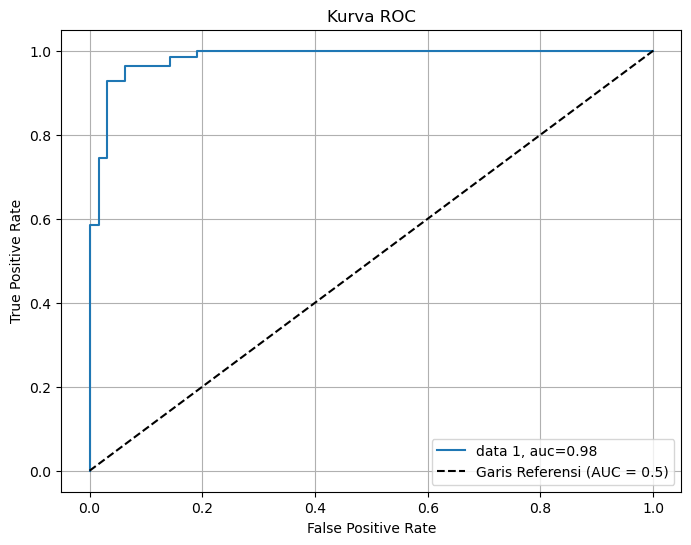

In [23]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics # Memastikan modul metrics diimpor

# Menghitung probabilitas prediksi kelas positif
y_pred_proba = model.predict_proba(X_test)[::, 1]

# Menggunakan metrics.roc_curve untuk mendapatkan False Positive Rate (fpr) 
# dan True Positive Rate (tpr) yang diperlukan untuk plotting
# Outputnya adalah (fpr, tpr, thresholds)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

# Menghitung nilai AUC (Area Under the Curve) secara terpisah
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Membuat plot kurva ROC
plt.figure(figsize=(8, 6)) # Mengatur ukuran figure untuk tampilan yang lebih baik
plt.plot(fpr, tpr, label="data 1, auc=" + str(round(auc, 2))) # Plot fpr vs tpr, bulatkan nilai AUC
plt.plot([0, 1], [0, 1], 'k--', label='Garis Referensi (AUC = 0.5)') # Tambahkan garis referensi
plt.xlabel("False Positive Rate") # Memberikan label sumbu X
plt.ylabel("True Positive Rate")  # Memberikan label sumbu Y
plt.title("Kurva ROC")             # Memberikan judul plot
plt.legend(loc=4)                  # Menampilkan legenda di lokasi terbaik
plt.grid(True)                     # Menambahkan grid untuk keterbacaan
plt.show()

In [25]:
#feature Selection

import sklearn.feature_selection as fs
rfe = fs.RFE(estimator=model, n_features_to_select=3)
rfe = rfe.fit(X_train, y_train)
print('Support=', rfe.support_)
print('Ranking=', rfe.ranking_)

Support= [False  True  True False  True]
Ranking= [3 1 1 2 1]
